In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias.html

In [2]:
filename = 'covid19-es-and.csv'
fecha = '26/04/2020'
url = 'https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias/detalle/235041.html'

In [3]:
# Load
tables = pd.read_html(url, header=0, thousands='.')
assert len(tables) > 0
dfL = tables[0]

In [4]:
# Prepare
dfL.set_index(['Provincia'], inplace=True)
del dfL['Positivo']
del dfL['UCI']
dfL.rename(columns={'Hospitalización': 'Ingresados', 'Curados': 'Altas', 'Fallecimientos': 'Bajas'}, inplace=True)
dfL['Fecha'] = fecha
dfL

,Ingresados,Bajas,Altas,Fecha
Provincia,,,,
Almería,204,45,229,26/04/2020
Cádiz,514,101,319,26/04/2020
Córdoba,522,94,647,26/04/2020
Granada,1120,229,1064,26/04/2020
Huelva,210,40,152,26/04/2020
Jaén,682,152,323,26/04/2020
Málaga,1394,249,1329,26/04/2020
Sevilla,1102,235,678,26/04/2020
Total,5748,1145,4741,26/04/2020


In [5]:
# Save to csv
campos_ordenados = ['Ingresados', 'Altas', 'Bajas', 'Fecha']
dfL[campos_ordenados].to_csv(filename, encoding='utf-8', header=False, mode='+a', index_label='Provincia')

In [6]:
# Load full csv
df = pd.read_csv(filename, thousands='.')

In [7]:
# Prepare
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
last_fecha = df['Fecha'].max()
df.set_index(['Provincia', 'Fecha'], inplace=True)
df.sort_index(inplace=True)

In [8]:
# Variaciones con respecto al día anterior
dfV = df.groupby(level='Provincia').pct_change() * 100
dfV.tail()

Ingresados      Altas     Bajas
Provincia Fecha                                      
Total     2020-04-22    1.016518   4.632073  3.244838
          2020-04-23    0.916442   7.789297  2.761905
          2020-04-24    1.050570   3.769171  2.594995
          2020-04-25    0.704846   7.590180  2.168022
          2020-04-26    0.577428  10.384168  1.237843

In [9]:
# Para seleccionar todas las filas de una o varias fechas hay que usar un trick ya que : no se puede usar en este caso
dfG = dfV.loc[(slice(None), [last_fecha]), :]

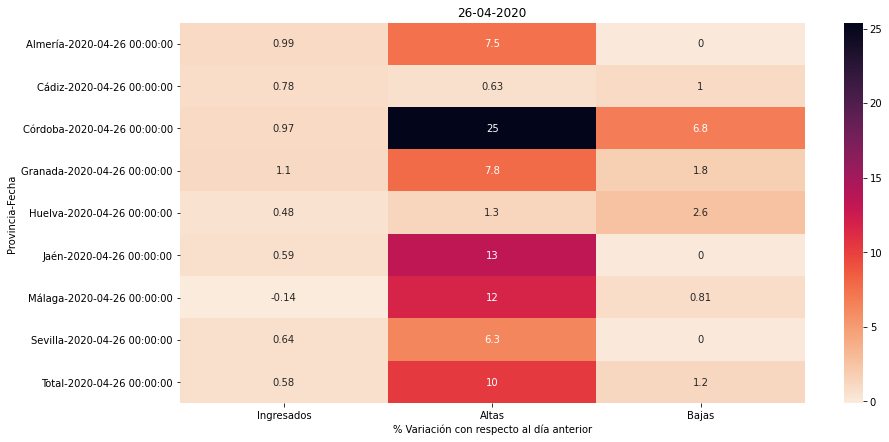

In [10]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title(last_fecha.strftime('%d-%m-%Y'))

# Invertir los colores
cmap = sns.cm.rocket_r

# Heatmap 
sns.heatmap(data=dfG, annot=True, cmap=cmap)

# Add label for horizontal axis
plt.xlabel('% Variación con respecto al día anterior')
plt.show()